In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
import dtale
dtale.show(df)

2021-11-11 18:28:23,786 - INFO     - NumExpr defaulting to 8 threads.


In [3]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Almost all columns have missing values except 4 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


lat and lon are only graphical locations, hence we dont need it in our analysis, hence i will drop those columns.

In [5]:
df.drop(['lat', 'lon'], axis=True, inplace=True)

station                AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Present_Tmax        AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Present_Tmin        AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
LDAPS_RHmin         AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
LDAPS_RHmax         AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
LDAPS_Tmax_lapse    AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
LDAPS_Tmin_lapse    AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
LDAPS_WS            AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
LDAPS_LH               AxesSubplot(0.125,0.391471;0.0824468x0.222059)
LDAPS_CC1           AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
LDAPS_CC2           AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
LDAPS_CC3           AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
LDAPS_CC4           AxesSubplot(0.520745,0.391471;0.0824468x0.222059)
LDAPS_PPT1          AxesSubplot(0.619681,0.391471;0.0824468x0.222059)
LDAPS_PPT2          

<Figure size 864x576 with 0 Axes>

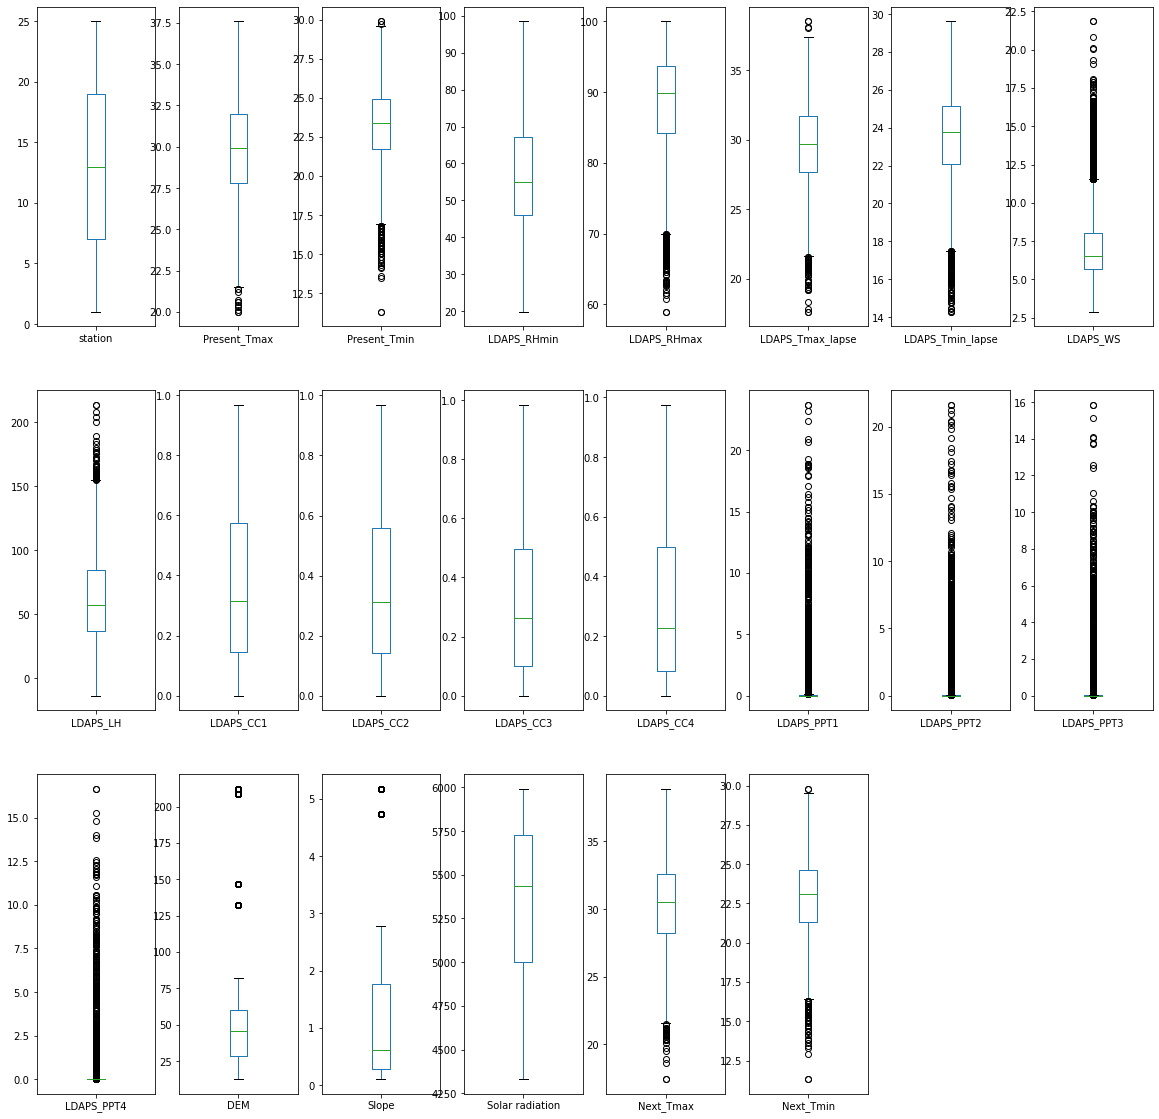

In [9]:
plt.figure(figsize=[12,8])
df.plot(kind='box', subplots=True, layout=(3,8), figsize= [20,20])

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

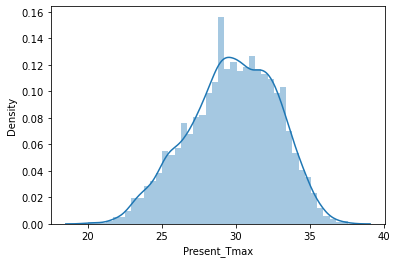

In [10]:
sns.distplot(df['Present_Tmax'])

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

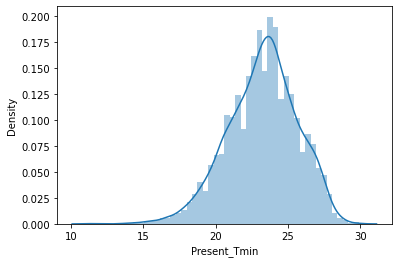

In [11]:
sns.distplot(df['Present_Tmin'])

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

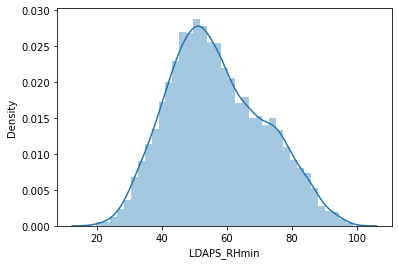

In [12]:
sns.distplot(df['LDAPS_RHmin'])

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

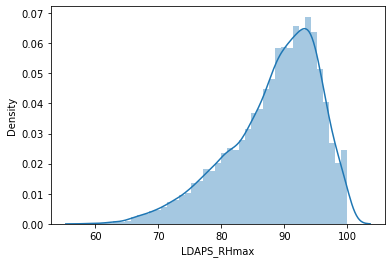

In [13]:
sns.distplot(df['LDAPS_RHmax'])

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

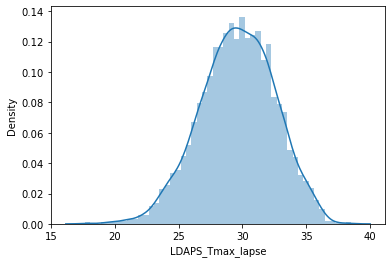

In [14]:
sns.distplot(df['LDAPS_Tmax_lapse'])

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

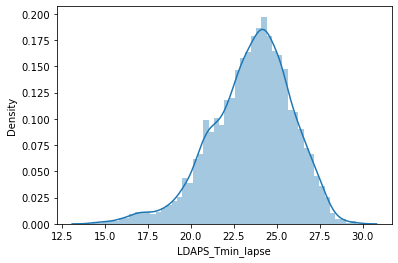

In [15]:
sns.distplot(df['LDAPS_Tmin_lapse'])

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

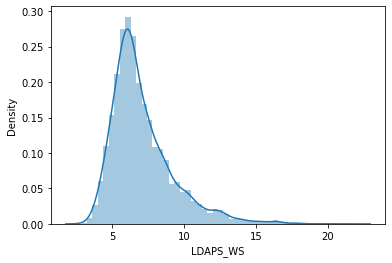

In [16]:
sns.distplot(df['LDAPS_WS'])

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

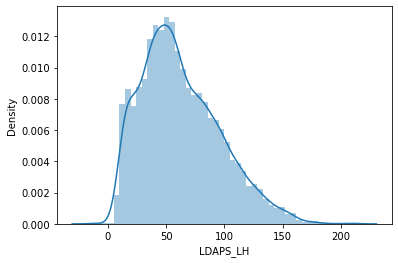

In [17]:
sns.distplot(df['LDAPS_LH'])

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

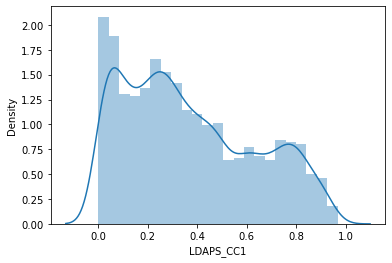

In [18]:
sns.distplot(df['LDAPS_CC1'])

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

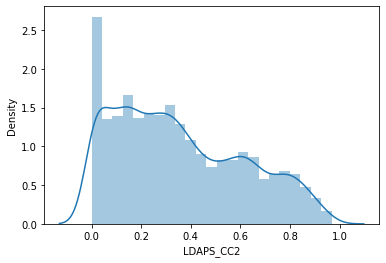

In [19]:
sns.distplot(df['LDAPS_CC2'])

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

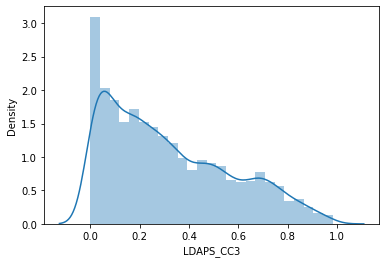

In [20]:
sns.distplot(df['LDAPS_CC3'])

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

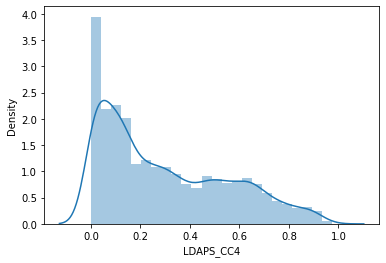

In [21]:
sns.distplot(df['LDAPS_CC4'])

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

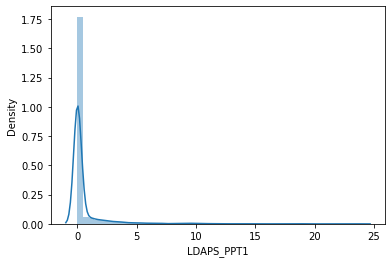

In [22]:
sns.distplot(df['LDAPS_PPT1'])

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

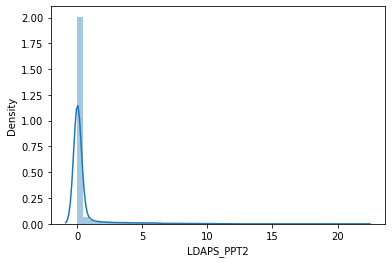

In [23]:
sns.distplot(df['LDAPS_PPT2'])

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

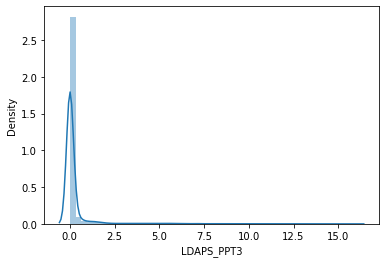

In [24]:
sns.distplot(df['LDAPS_PPT3'])

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

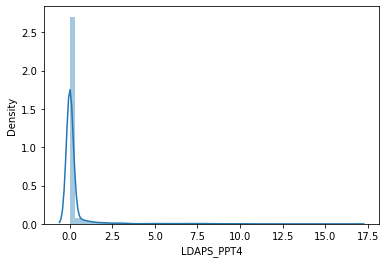

In [25]:
sns.distplot(df['LDAPS_PPT4'])

<AxesSubplot:xlabel='DEM', ylabel='Density'>

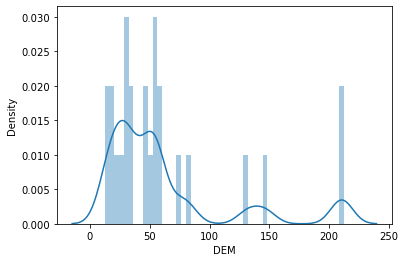

In [26]:
sns.distplot(df['DEM'])

<AxesSubplot:xlabel='Slope', ylabel='Density'>

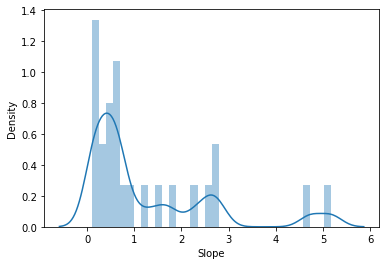

In [27]:
sns.distplot(df['Slope'])

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

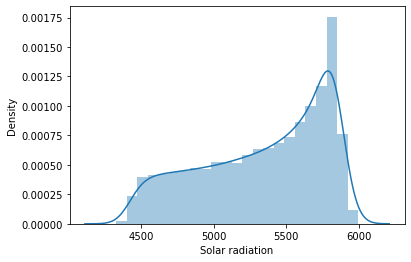

In [28]:
sns.distplot(df['Solar radiation'])

As we can see from distribution plots and boxplots, there are most of the columns having outliers leading to skewness.

In [29]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

As we can see, that most of the columns have the skewess, hence i will use median and mode to imput the missing values.

In [30]:
df['station'] = df['station'].fillna(df['station'].median())
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])
df['Present_Tmax'] = df['Present_Tmax'].fillna(df['Present_Tmax'].median())
df['Present_Tmin'] = df['Present_Tmin'].fillna(df['Present_Tmin'].median())
df['LDAPS_RHmin'] = df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].median())
df['LDAPS_RHmax'] = df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].median())
df['LDAPS_Tmax_lapse'] = df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].median())
df['LDAPS_Tmin_lapse'] = df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].median())
df['LDAPS_WS'] = df['LDAPS_WS'].fillna(df['LDAPS_WS'].median())
df['LDAPS_LH'] = df['LDAPS_LH'].fillna(df['LDAPS_LH'].median())
df['LDAPS_CC1'] = df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].median())
df['LDAPS_CC2'] = df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].median())
df['LDAPS_CC3'] = df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].median())
df['LDAPS_CC4'] = df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].median())
df['LDAPS_PPT1'] = df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].median())
df['LDAPS_PPT2'] = df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].median())
df['LDAPS_PPT3'] = df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].median())
df['LDAPS_PPT4'] = df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].median())
df['Next_Tmax'] = df['Next_Tmax'].fillna(df['Next_Tmax'].median())
df['Next_Tmin'] = df['Next_Tmin'].fillna(df['Next_Tmin'].median())

In [31]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now there are no missing values, hence we can proceed.

<AxesSubplot:>

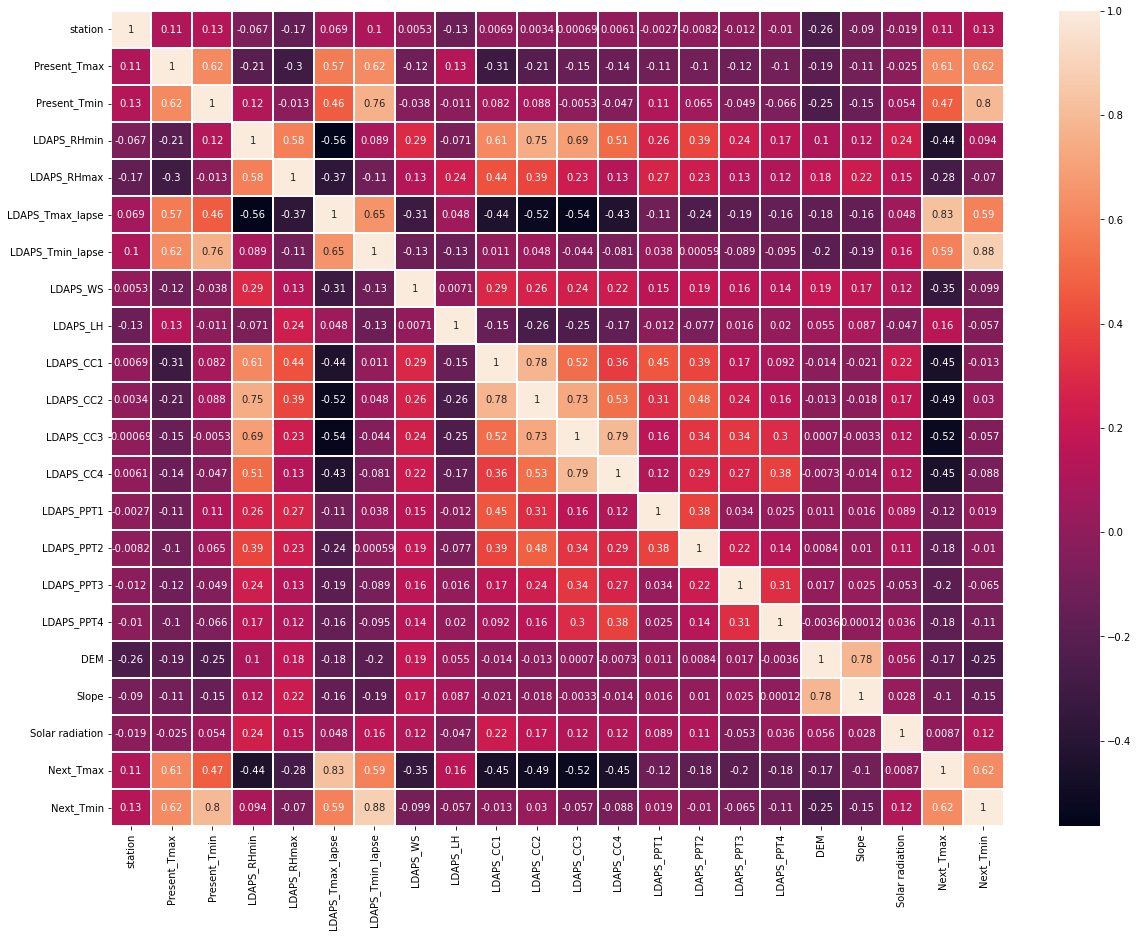

In [32]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, linewidths=1)

1. LDAPS_CC2 with LDAPS_RHmin, LDSAPS_CC1, LDAPS_CC3
2. LDAPS_CC3 with LDAPS_CC4
3. Slope with DEM
4.The above features are having high correlation, resulting the problem of multicollenearity, hence i have to drop some of them.

In [33]:
df.drop(['LDAPS_CC2', 'LDAPS_CC4', 'Slope' ], axis=1, inplace=True)

<AxesSubplot:>

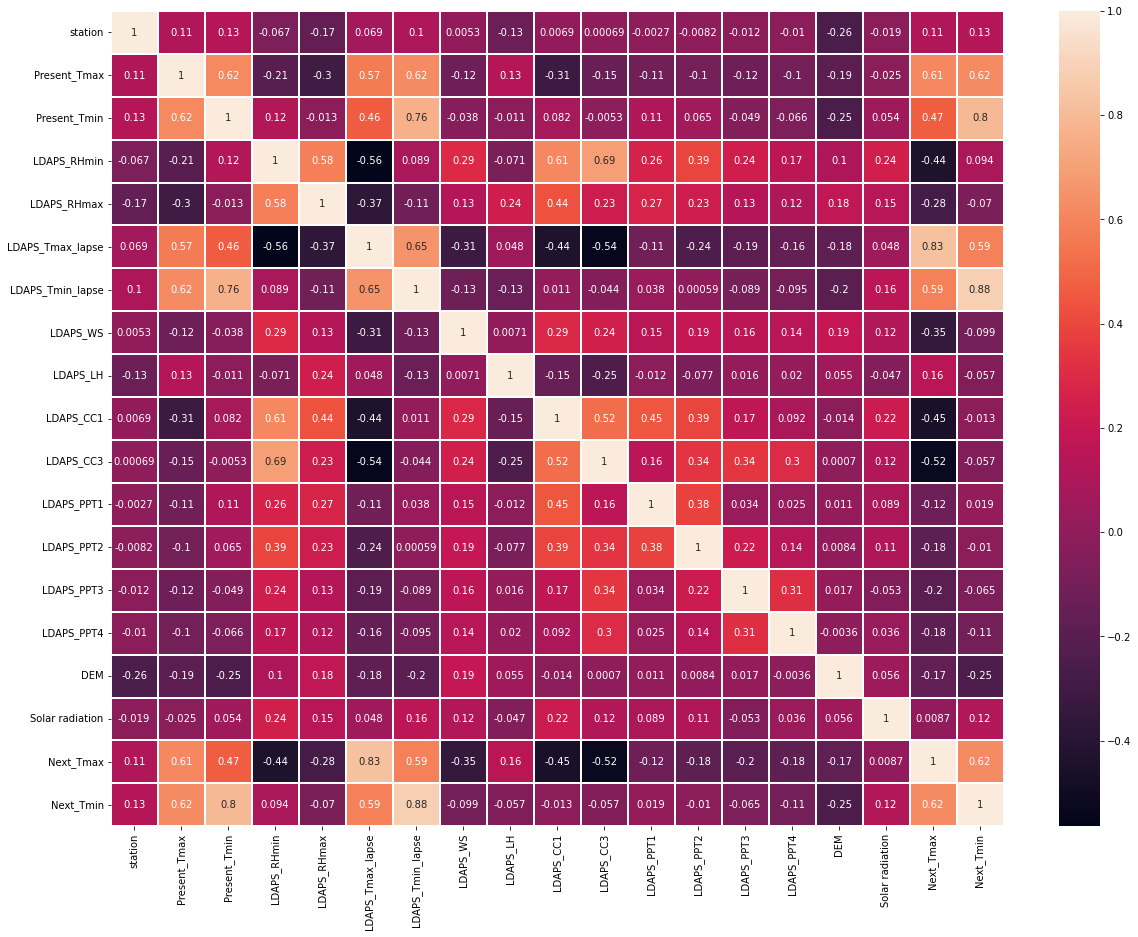

In [34]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, linewidths=1)

Now the data is free from the problem of multicolleniarity.

In [35]:
df['day'] = pd.to_datetime(df['Date']).dt.day
df['month'] = pd.to_datetime(df['Date']).dt.month
df['year'] = pd.to_datetime(df['Date']).dt.year
df.drop(['Date'], axis=1, inplace=True)

In [36]:
df['year'].value_counts()

2013    1552
2015    1550
2014    1550
2017    1550
2016    1550
Name: year, dtype: int64

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))

threshold=3
print(np.where(z>3))

data_new=df[(z<3).all(axis=1)]
data_new.shape

(array([  25,   25,   26, ..., 7751, 7751, 7751]), array([ 7, 12, 12, ..., 12, 13, 14]))


(6894, 22)

In [38]:
((7752-6894)/7752)*100

11.06811145510836

We will loose 11% of the data if we remove all the outliers, hence instead to removing outliers, i will use transformation method to reduce the skewness.

In [39]:
dfx = df.drop(['Next_Tmax', 'Next_Tmin' ], axis = 1)
dfx

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC3,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Solar radiation,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.161697,0.000000,0.000000,0.000000,0.000000,212.3350,5992.895996,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.159444,0.000000,0.000000,0.000000,0.000000,44.7624,5869.312500,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.204091,0.000000,0.000000,0.000000,0.000000,33.3068,5863.555664,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.161157,0.000000,0.000000,0.000000,0.000000,45.7160,5856.964844,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.178892,0.000000,0.000000,0.000000,0.000000,35.0380,5859.552246,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.000000,0.000000,0.000000,0.000000,0.000000,15.5876,4443.313965,30,8,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.000000,0.000000,0.000000,0.000000,0.000000,17.2956,4438.373535,30,8,2017
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.000000,0.000000,0.000000,0.000000,0.000000,19.5844,4451.345215,30,8,2017
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.3700,4329.520508,7,1,2013


In [40]:
y = df[['Next_Tmax', 'Next_Tmin']]
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4
7750,17.4,11.3


In [41]:
from sklearn.preprocessing import power_transform
x = power_transform(dfx, method = "yeo-johnson")
x

array([[-1.86035552, -0.40953245, -0.79855981, ...,  1.418736  ,
        -0.58150442, -1.41389176],
       [-1.64838475,  0.70462688, -0.72101794, ...,  1.418736  ,
        -0.58150442, -1.41389176],
       [-1.4548483 ,  0.59515791, -0.02867622, ...,  1.418736  ,
        -0.58150442, -1.41389176],
       ...,
       [ 1.54118849, -2.0495223 , -2.17942702, ...,  1.418736  ,
         0.36430408,  1.41417055],
       [ 0.0770875 , -2.84457064, -3.68295649, ..., -1.25545528,
        -2.26805381, -1.41389176],
       [ 0.0770875 ,  2.98237529,  3.23514087, ..., -1.25545528,
        -2.26805381, -1.41389176]])

In [42]:
from sklearn.metrics import r2_score

maxscore=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2score = r2_score(y_test,pred)
    if r2score>maxscore:
        maxscore=r2score
        maxRS=i
print("Best r2 score is ", maxscore, 'on Random state ', maxRS)

Best r2 score is  0.8038648345730992 on Random state  160


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=160)

In [44]:
model=[LinearRegression(),KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    m_pred=m.predict(x_test)
    r2sscore = r2_score(y_test,m_pred)
    MSE= mean_squared_error(y_test,m_pred)
    
    print(m)
    print(m.score(x_train,y_train))
    print('R2 score for :', m, 'is', r2sscore)
    print('Mean Squared Error for ',m ,"is:" ,MSE)
    print("\n")

LinearRegression()
0.7872945148820952
R2 score for : LinearRegression() is 0.8038648345730992
Mean Squared Error for  LinearRegression() is: 1.6883728004677279


KNeighborsRegressor()
0.922884558590903
R2 score for : KNeighborsRegressor() is 0.8917272797851938
Mean Squared Error for  KNeighborsRegressor() is: 0.8785262252794499


DecisionTreeRegressor()
1.0
R2 score for : DecisionTreeRegressor() is 0.7739416552085141
Mean Squared Error for  DecisionTreeRegressor() is: 1.87598237317283


RandomForestRegressor()
0.9846654099955424
R2 score for : RandomForestRegressor() is 0.8965198370327334
Mean Squared Error for  RandomForestRegressor() is: 0.8570789776440255




In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
for i in model:
    kfold=KFold(5)
    score=cross_val_score(i,x,y,cv=kfold)
    print(i, "CV Score is ",score.mean())

LinearRegression() CV Score is  0.7129453171613157
KNeighborsRegressor() CV Score is  0.5022464870417378
DecisionTreeRegressor() CV Score is  0.4152998224146093
RandomForestRegressor() CV Score is  0.6982226070909676


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {'fit_intercept' : [True, False],
             'normalize' : [True, False],
             'n_jobs': np.arange(1,20),
             'copy_X' : [True, False],
             'positive' : [True, False] }

In [48]:
GSV = GridSearchCV(LinearRegression(),parameters,cv=5)
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'normalize': [True, False],
                         'positive': [True, False]})

In [49]:
GSV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': False}

In [50]:
Final_Model = LinearRegression(fit_intercept= True, normalize= True, n_jobs= 1, copy_X= True, positive=False)
Final_Model.fit(x_train,y_train)
Final_Model.score(x_train,y_train)
model_pred=Final_Model.predict(x_test)
r2score = r2_score(y_test,model_pred)
MSE= mean_squared_error(y_test,model_pred)

print(Final_Model.score(x_train,y_train))
print('R2 score is :',r2score)
print('Mean Squared Error is ',MSE)

0.7872945148820953
R2 score is : 0.803864834573099
Mean Squared Error is  1.6883728004677292


With the help of hyperparameter tuning I achived the R2 score of 0.80

In [51]:
prediction = Final_Model.predict(x_test)
prediction

array([[25.24412074, 21.83308005],
       [32.91362529, 23.88919566],
       [23.32966713, 17.45186835],
       ...,
       [30.10430134, 25.77753973],
       [30.84180382, 23.22216334],
       [30.33867091, 24.36291259]])

In [52]:
prediction.shape

(2326, 2)

In [53]:
import joblib
joblib.dump(Final_Model,'Temperature_Forecast_Project.obj')

['Temperature_Forecast_Project.obj']